In [148]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt

from qiskit import Aer
from tqdm.notebook import tqdm
from sklearn.datasets import load_iris

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from analysis import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Iris Data

## Data Preparation

In [149]:
iris = load_iris()

In [154]:
x = iris.data
y = iris.target

### Only first two classes

In [155]:
x = x[y != 2]
y = y[y != 2].reshape(-1,1)
print(x.shape, y.shape)

(100, 4) (100, 1)


### Normalize Input Data

In [156]:
x = x - np.amin(x, axis = 0)
x = x/np.max(x, axis = 0)
x = np.pi*x

In [157]:
print(x)

[[0.93084227 1.96349541 0.30649684 0.18479957]
 [0.6981317  1.30899694 0.30649684 0.18479957]
 [0.46542113 1.57079633 0.22987263 0.18479957]
 [0.34906585 1.43989663 0.38312106 0.18479957]
 [0.81448698 2.0943951  0.30649684 0.18479957]
 [1.27990812 2.48709418 0.53636948 0.5543987 ]
 [0.34906585 1.83259571 0.30649684 0.36959914]
 [0.81448698 1.83259571 0.38312106 0.18479957]
 [0.11635528 1.17809725 0.30649684 0.18479957]
 [0.6981317  1.43989663 0.38312106 0.        ]
 [1.27990812 2.2252948  0.38312106 0.18479957]
 [0.58177642 1.83259571 0.45974527 0.18479957]
 [0.58177642 1.30899694 0.30649684 0.        ]
 [0.         1.30899694 0.07662421 0.        ]
 [1.74532925 2.61799388 0.15324842 0.18479957]
 [1.62897397 3.14159265 0.38312106 0.5543987 ]
 [1.27990812 2.48709418 0.22987263 0.5543987 ]
 [0.93084227 1.96349541 0.30649684 0.36959914]
 [1.62897397 2.35619449 0.53636948 0.36959914]
 [0.93084227 2.35619449 0.38312106 0.36959914]
 [1.27990812 1.83259571 0.53636948 0.18479957]
 [0.93084227 

## Train Model

In [158]:
backend = Aer.get_backend('qasm_simulator')

In [159]:
np.random.seed(42)
network1 = sequential_qnn(q_bits = [4, 4],
                         dim = [4, 4, 1],
                         reps = 1,
                         backend = backend,
                         shots = 10000,
                         lr = 0.1)

In [ ]:
network1.train(x,y, epochs = 50, verbose = True)

  0%|          | 0/50 [00:00<?, ?it/s]

epoch: 0, loss: 0.2524393017
epoch: 1, loss: 0.22672946730000004
epoch: 2, loss: 0.2030848134
epoch: 3, loss: 0.18048120129999998
epoch: 4, loss: 0.16147624459999999
epoch: 5, loss: 0.1420273233
epoch: 6, loss: 0.12470912599999999
epoch: 7, loss: 0.1070074084
epoch: 8, loss: 0.09293562759999999


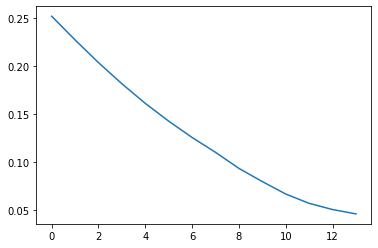

In [130]:
plt.plot(network1.loss)

In [108]:
saver(network1, data_path("Iris_qnn1"))

In [137]:
np.random.seed(40)
network2 = sequential_dnn(dim=[4, 1], lr=0.1)

In [138]:
network2.train(x,y, epochs = 100, verbose = True)

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.3775358823211864
epoch: 1, loss: 0.28129638188806316
epoch: 2, loss: 0.17548288047228625
epoch: 3, loss: 0.10896956032481572
epoch: 4, loss: 0.09490347181302317
epoch: 5, loss: 0.09896988961224515
epoch: 6, loss: 0.10128108602903954
epoch: 7, loss: 0.0977885099798093
epoch: 8, loss: 0.08921561010850576
epoch: 9, loss: 0.0773780984232405
epoch: 10, loss: 0.06417900237668123
epoch: 11, loss: 0.05124637831293874
epoch: 12, loss: 0.039733297001367095
epoch: 13, loss: 0.03023968672950959
epoch: 14, loss: 0.022876335462861896
epoch: 15, loss: 0.01742993766263173
epoch: 16, loss: 0.013542827332110747
epoch: 17, loss: 0.010842494145424788
epoch: 18, loss: 0.009006625722541075
epoch: 19, loss: 0.007781526947283517
epoch: 20, loss: 0.006977033495339147
epoch: 21, loss: 0.006453756473944822
epoch: 22, loss: 0.006110410712600076
epoch: 23, loss: 0.005873863234350313
epoch: 24, loss: 0.005692093427925673
epoch: 25, loss: 0.005529373530125847
epoch: 26, loss: 0.005362842351577139
e

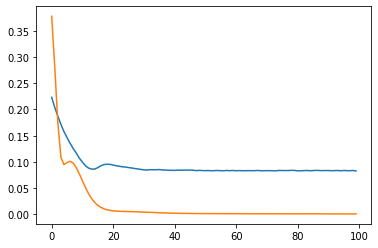

In [139]:
network1 = loader(data_path("Iris_qnn1"))
plt.plot(network1.loss)
plt.plot(network2.loss)
plt.show()